##### Analysis of dimer sedimentation experiments using CATCH+Lorenz Mie fits. We expect $z_p(t)$ to decrease with time but also of interest is the orientation of the dimer, which may be captured via $n_p(t) = n_p(\theta)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
def plot_sedimentation(filename):
    
    #load
    df = pd.read_csv(filename)  
    print(df.head())
    
    #filtering
    X = df['x_p']
    Y = df['y_p']
    Z = df['z_p']
    n_p = df['n_p']
    a_p = df['a_p']
    T = df['framenum']

    bad_index = []            
    thresh = 100 #max possible displacement in z in 0.033 s
    X_best_prev = X[0]
    Y_best_prev = Y[0]

    for i in range(1,len(X)):

        x_curr = X[i]
        x_prev = X[i-1]
        y_curr = Y[i]
        y_prev = Y[i-1]

        if (abs(X_best_prev - x_curr)>thresh) or (abs(Y_best_prev - y_curr) > thresh) or (n_p[i]>1.8) or (n_p[i]<1.2):
            bad_index.append(i)
        else:
            x_best_prev = x_curr
            y_best_prev = y_curr

    print(len(bad_index))
    X_filt = [X[i]*0.048 for i in range(len(X)) if i not in bad_index]
    Y_filt = [Y[i]*0.048 for i in range(len(Y)) if i not in bad_index]
    Z_filt = [Z[i]*0.048 for i in range(len(Z)) if i not in bad_index]
    Z_filt = [Z[i]*0.048 for i in range(len(Z)) if i not in bad_index]
    ap_filt = [a_p[i] for i in range(len(a_p)) if i not in bad_index]
    np_filt = [n_p[i] for i in range(len(n_p)) if i not in bad_index]

    t_filt = [T[i]/30 for i in range(len(T)) if i not in bad_index]
    
    #plotting
    fig, axs = plt.subplots(3, figsize=(6,6))
    ax0 = axs[0]
    ax1 = axs[1]
    ax2 = axs[2]

    ax0.scatter(t_filt, Z_filt, marker = 'o', facecolors='none', edgecolors='tab:green')
    ax0.set_xlabel(r't (s)')
    ax0.set_ylabel(r'$z_{p}\,(\mu m)$')
    ax0.set_ylim([5,55])

    ax1.scatter(t_filt, np_filt, marker = 'o', facecolors='none', edgecolors='y')
    ax1.set_xlabel(r't (s)')
    ax1.set_ylabel(r'$n_{p}$')
    ax1.set_ylim([1.42,1.48])

    b = ax2.scatter(ap_filt, np_filt, marker = 'o', c = t_filt, cmap = 'summer')
    ax2.set_xlabel(r'$a_{p}\,(\mu m)$')
    ax2.set_ylabel(r'$n_{p}$')
    ax2.set_ylim([1.42,1.48])
    ax2.set_xlim([0.7, 3.0])
    cbar = fig.colorbar(b, ax=ax2, shrink=1.0)

    plt.tight_layout()
    
    name = filename[14:-4]
    plt.savefig(name, dpi = 400)

# 090122: PROLATE, INITIAL HEIGHT = 900, EXP01

  label      conf         x_p         y_p                  bbox  edge  \
0  holo  0.910890  906.896089  274.912361  ((565, 0), 679, 630)  True   
1  holo  0.901903  908.737683  277.608052  ((567, 4), 681, 622)  True   
2  holo  0.905377  909.222265  277.313932  ((565, 2), 685, 626)  True   
3  holo  0.915642  907.607843  273.447593  ((566, 0), 681, 622)  True   
4  holo  0.917556  909.224353  274.535620  ((565, 0), 683, 626)  True   

   framenum         z_p       a_p       n_p  \
0         0  573.398533  0.943035  1.463670   
1         1  682.398494  0.729267  1.872278   
2         2  691.438715  0.718468  1.884624   
3         3  601.162846  0.846407  1.474733   
4         4  690.995305  0.725614  1.881480   

                                           framepath     redchi  
0  /home/group/datasets/Polymers_Jatin/dimers/090...  17.245755  
1  /home/group/datasets/Polymers_Jatin/dimers/090...  16.463115  
2  /home/group/datasets/Polymers_Jatin/dimers/090...  15.893587  
3  /home/group

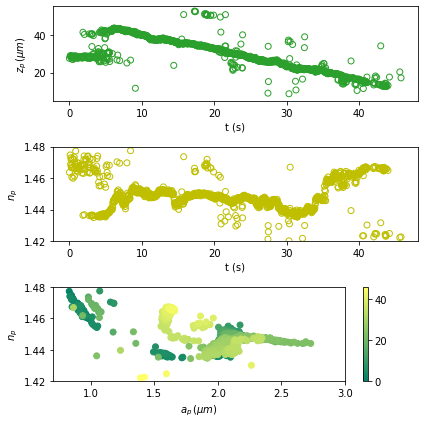

In [80]:
plot_sedimentation('CATCH_refined_090122_prolate_z=900.csv')

# 090122: PROLATE, INITIAL HEIGHT = 900, EXP02

  label      conf         x_p         y_p                  bbox  edge  \
0  holo  0.889789  608.614874  365.515115  ((239, 8), 731, 711)  True   
1  holo  0.894848  609.625441  365.063021  ((242, 8), 731, 712)  True   
2  holo  0.887680  608.522426  365.336052  ((243, 8), 726, 711)  True   
3  holo  0.889418  608.488181  364.486447  ((240, 8), 732, 712)  True   
4  holo  0.896171  610.351122  362.555857  ((239, 8), 734, 707)  True   

   framenum         z_p       a_p       n_p  \
0         0  773.263226  2.201725  1.435376   
1         1  776.596770  2.193447  1.435416   
2         2  777.872312  2.136195  1.435884   
3         3  761.258194  2.236197  1.435527   
4         4  906.933885  2.066331  1.436105   

                                           framepath     redchi  
0  /home/group/datasets/Polymers_Jatin/dimers/090...  12.823485  
1  /home/group/datasets/Polymers_Jatin/dimers/090...  12.550126  
2  /home/group/datasets/Polymers_Jatin/dimers/090...  12.826370  
3  /home/group

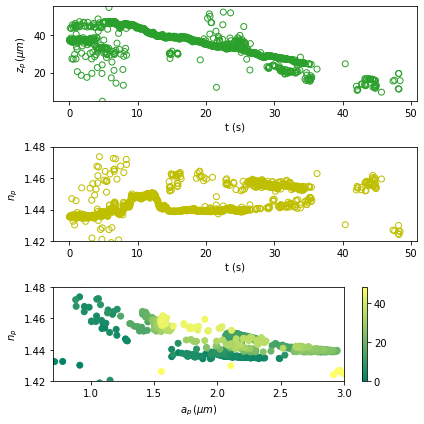

In [81]:
plot_sedimentation('CATCH_refined_090122_prolate_z=900_02.csv')